In [ ]:
!pip install kagglehub --quiet

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Download the public dataset from Kaggle
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")
print("Downloaded to:", path)

# Load the dataset
df = pd.read_csv(path + "/ds_salaries.csv")
df.head()

Downloaded to: /kaggle/input/data-science-job-salaries


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# Drop unnecessary columns
df = df.drop(['salary_currency', 'employee_residence', 'company_location'], axis=1)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Check if null values exist
print("Missing values:\n", df.isnull().sum())

# Define features and target
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

Missing values:
 Unnamed: 0                        0
work_year                         0
salary                            0
salary_in_usd                     0
remote_ratio                      0
                                 ..
job_title_Product Data Analyst    0
job_title_Research Scientist      0
job_title_Staff Data Scientist    0
company_size_M                    0
company_size_S                    0
Length: 62, dtype: int64


In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define base models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Combine using Voting Regressor
ensemble = VotingRegressor([('rf', rf), ('gb', gb)])
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

In [ ]:
# Predict on test set
y_pred = ensemble.predict(X_test)

# Print evaluation metrics
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.6304795635278324
Mean Squared Error: 1416212634.939202


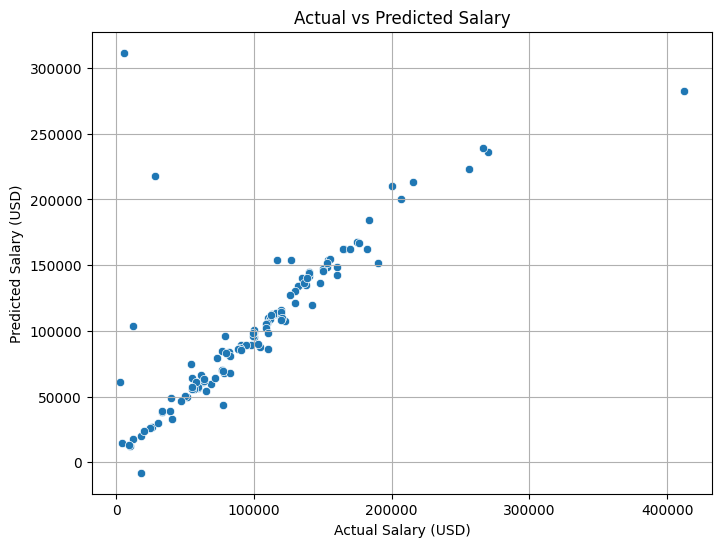

In [ ]:
# Scatterplot: Actual vs Predicted Salaries
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()

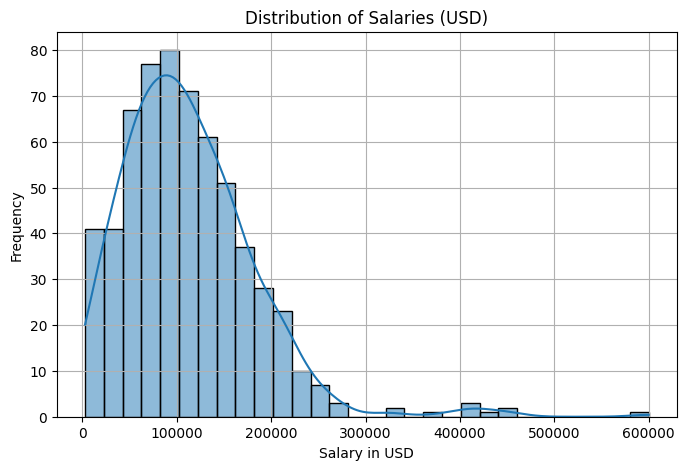

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

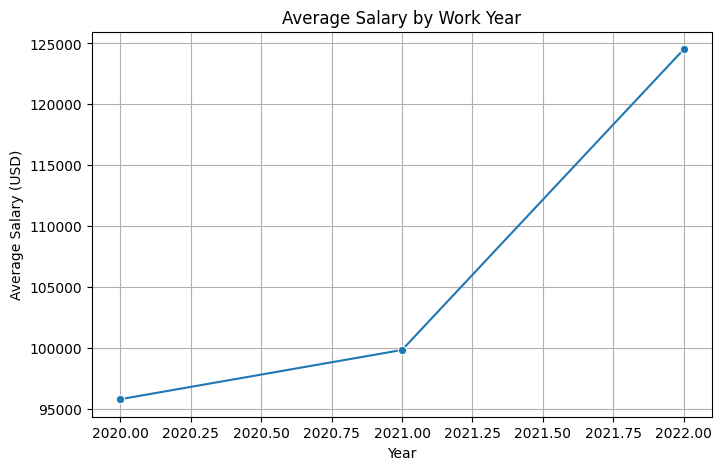

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df.groupby('work_year')['salary_in_usd'].mean().reset_index(),
             x='work_year', y='salary_in_usd', marker='o')
plt.title('Average Salary by Work Year')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()


/tmp/ipython-input-17-2194030021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='company_size', y='salary_in_usd', data=df_original, palette='Set2')


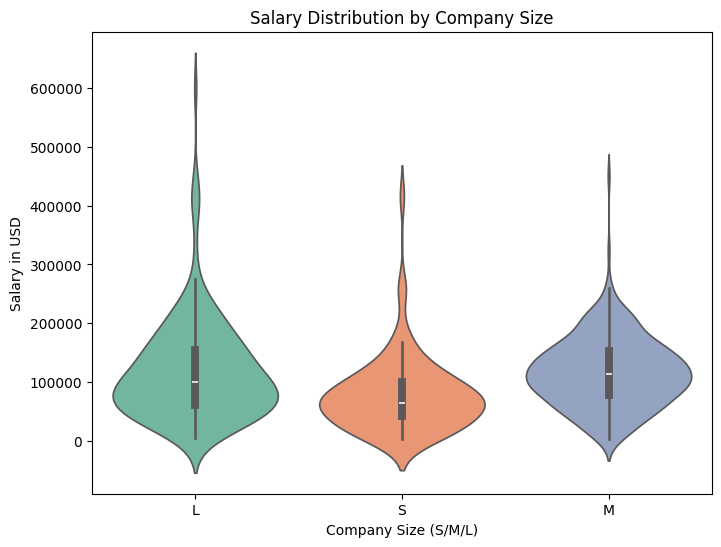

In [17]:
plt.figure(figsize=(8,6))
sns.violinplot(x='company_size', y='salary_in_usd', data=df_original, palette='Set2')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size (S/M/L)')
plt.ylabel('Salary in USD')
plt.show()
